In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../dataFiles/houseprices.csv")
print(data)

   size  bedroom   price
0  2104        3  399900
1  1600        3  329900
2  2400        3  369000
3  1416        2  232000
4  3000        4  539900


In [3]:
# Extract the features and target variable
X = data[['size', 'bedroom']].values
y = data['price'].values

# Feature scaling
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

print(X)

[[ 0.          0.        ]
 [-0.88604177  0.        ]
 [ 0.52037374  0.        ]
 [-1.20951734 -1.58113883]
 [ 1.57518537  1.58113883]]


In [4]:
# Initialize parameters
w = np.zeros(X.shape[1])  # Weights
b = 0  # Bias
learning_rate = 0.01
num_epochs = 1000

In [5]:
# Define the cost function
def cost_function(X, y, w, b):
    m = len(y)
    predictions = X.dot(w) + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient Descent
cost_history = []

for epoch in range(num_epochs):
    # Calculate and store cost
    cost = cost_function(X, y, w, b)
    cost_history.append(cost)
    
    predictions = X.dot(w) + b
    error = predictions - y
    
    # Calculate gradients
    grad_w = (-2 / len(X)) * np.dot(X.T, error)
    grad_b = (-2 / len(X)) * np.sum(error)
    
    # Update parameters
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b

 
print(f'MSE = {cost}')
    # if (epoch % 100 == 0):
        # print(f'Epoch {epoch}: Cost = {cost}')

MSE = 5.307270217699939e+41


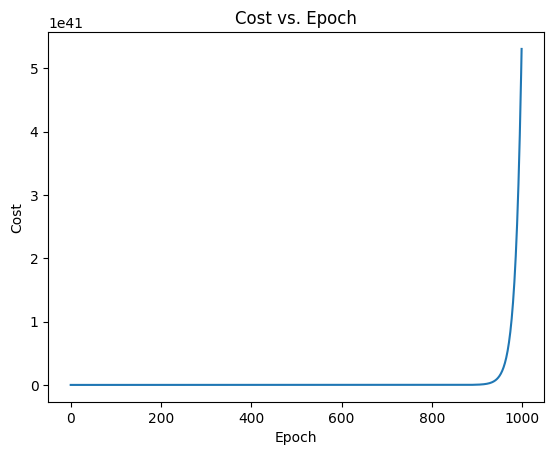

In [6]:
# Plot the cost history
plt.plot(range(num_epochs), cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs. Epoch')
plt.show()